# Импорт библиотек и загрузка данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
# Настройки для графиков
plt.style.use('ggplot')
sns.set_palette('Set2')

In [7]:
file_path = 'cian_data.csv'  # Убедитесь, что файл находится в той же папке
apartment_data = pd.read_csv(file_path)

In [8]:
# Отображаем первые строки для ознакомления
apartment_data.head()

,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2,8,2.1,66.0,-1,0,22622160,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Резиденция Дипломат
0,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
1,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
2,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
3,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат
4,Дипломат,developer,https://krym.cian.ru/sale/flat/292125018/,Москва и Московская область,sale,flat,2.0,8,2,66.0,-1,0,22622160,NaN,NaN,NaN,NaN,Резиденция Дипломат


# Предобработка данных

In [9]:
# Удаляем ненужные столбцы и переименовываем некоторые для удобства анализа
apartment_data_cleaned = apartment_data.drop(columns=[
    'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
    'https://krym.cian.ru/sale/flat/292125018/', 'Резиденция Дипломат'
])

# Переименуем столбцы для удобства
apartment_data_cleaned.columns = [
    'Complex', 'Developer', 'Region', 'Deal_Type', 'Property_Type',
    'Floor', 'Total_Floors', 'Rooms', 'Area', 'Year', 'Condition', 'Price'
]

In [10]:
# Преобразуем необходимые столбцы к числовому формату
apartment_data_cleaned['Floor'] = pd.to_numeric(apartment_data_cleaned['Floor'], errors='coerce')
apartment_data_cleaned['Total_Floors'] = pd.to_numeric(apartment_data_cleaned['Total_Floors'], errors='coerce')
apartment_data_cleaned['Rooms'] = pd.to_numeric(apartment_data_cleaned['Rooms'], errors='coerce')
apartment_data_cleaned['Area'] = pd.to_numeric(apartment_data_cleaned['Area'], errors='coerce')
apartment_data_cleaned['Price'] = pd.to_numeric(apartment_data_cleaned['Price'], errors='coerce')

In [11]:
# Проверяем очищенные данные
apartment_data_cleaned.info()
apartment_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11743 entries, 0 to 11742
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Complex        11743 non-null  object 
 1   Developer      11307 non-null  object 
 2   Region         11306 non-null  object 
 3   Deal_Type      11303 non-null  object 
 4   Property_Type  11303 non-null  object 
 5   Floor          11301 non-null  float64
 6   Total_Floors   11300 non-null  float64
 7   Rooms          11299 non-null  float64
 8   Area           11299 non-null  float64
 9   Year           11300 non-null  object 
 10  Condition      11298 non-null  object 
 11  Price          11293 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.1+ MB


,Complex,Developer,Region,Deal_Type,Property_Type,Floor,Total_Floors,Rooms,Area,Year,Condition,Price
0,Дипломат,developer,Москва и Московская область,sale,flat,2.0,8.0,2.0,66.0,-1,0,22622160.0
1,Дипломат,developer,Москва и Московская область,sale,flat,2.0,8.0,2.0,66.0,-1,0,22622160.0
2,Дипломат,developer,Москва и Московская область,sale,flat,2.0,8.0,2.0,66.0,-1,0,22622160.0
3,Дипломат,developer,Москва и Московская область,sale,flat,2.0,8.0,2.0,66.0,-1,0,22622160.0
4,Дипломат,developer,Москва и Московская область,sale,flat,2.0,8.0,2.0,66.0,-1,0,22622160.0


# Анализ распределения цен

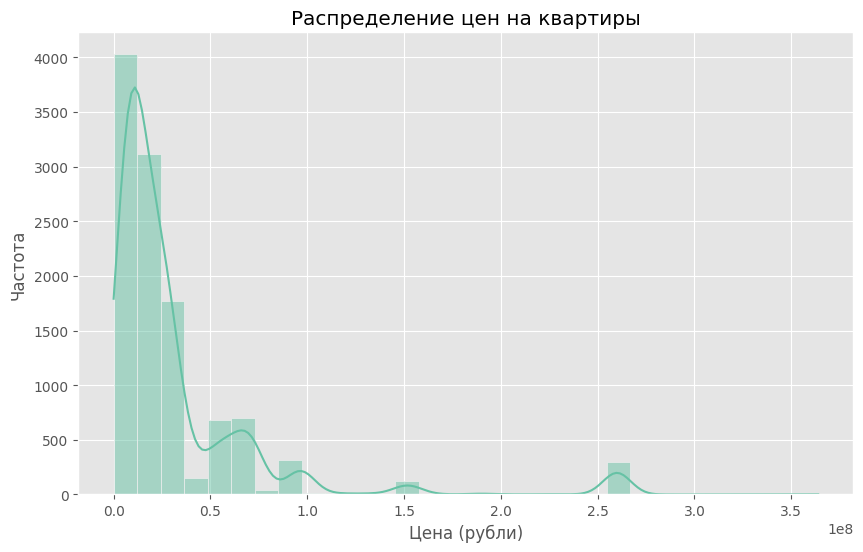

In [12]:
# График распределения цен
plt.figure(figsize=(10, 6))
sns.histplot(apartment_data_cleaned['Price'].dropna(), bins=30, kde=True)
plt.title('Распределение цен на квартиры')
plt.xlabel('Цена (рубли)')
plt.ylabel('Частота')
plt.show()


# Анализ распределения площадей

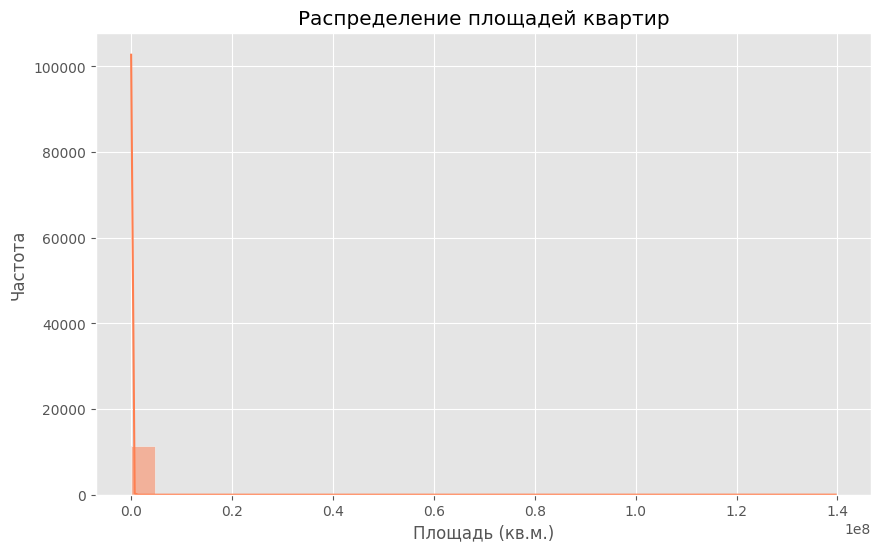

In [13]:
# График распределения площадей
plt.figure(figsize=(10, 6))
sns.histplot(apartment_data_cleaned['Area'].dropna(), bins=30, kde=True, color='coral')
plt.title('Распределение площадей квартир')
plt.xlabel('Площадь (кв.м.)')
plt.ylabel('Частота')
plt.show()


Можно рассмотреть корреляции между площадью, ценой и количеством комнат.

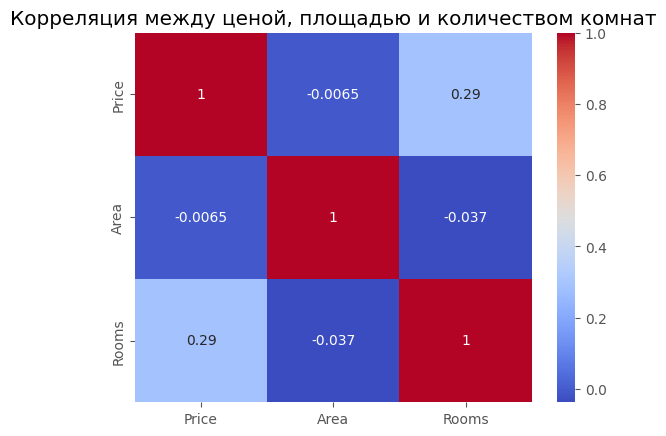

In [14]:
# Корреляция между ценой, площадью и количеством комнат
correlation_matrix = apartment_data_cleaned[['Price', 'Area', 'Rooms']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между ценой, площадью и количеством комнат')
plt.show()

# Гистограмма количества комнат

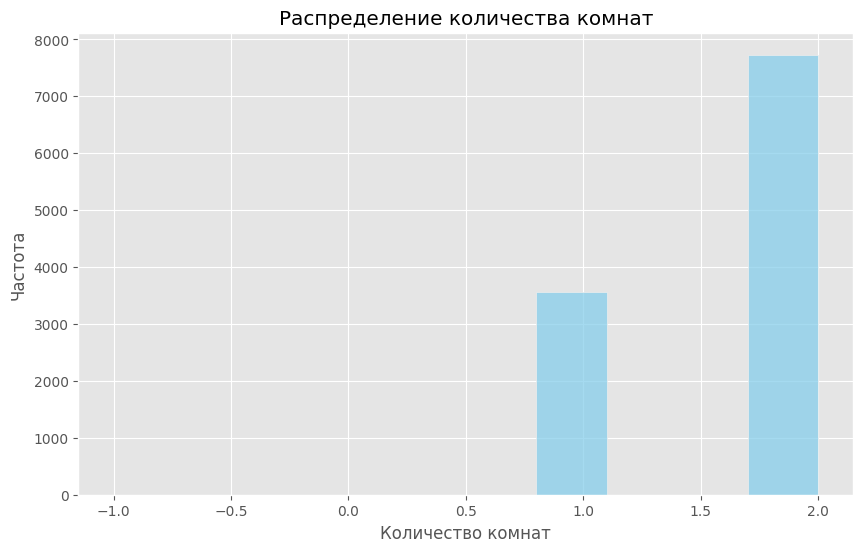

In [17]:
# Гистограмма количества комнат
plt.figure(figsize=(10, 6))
sns.histplot(apartment_data_cleaned['Rooms'].dropna(), bins=10, kde=False, color='skyblue')
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()


# Гистограмма этажей

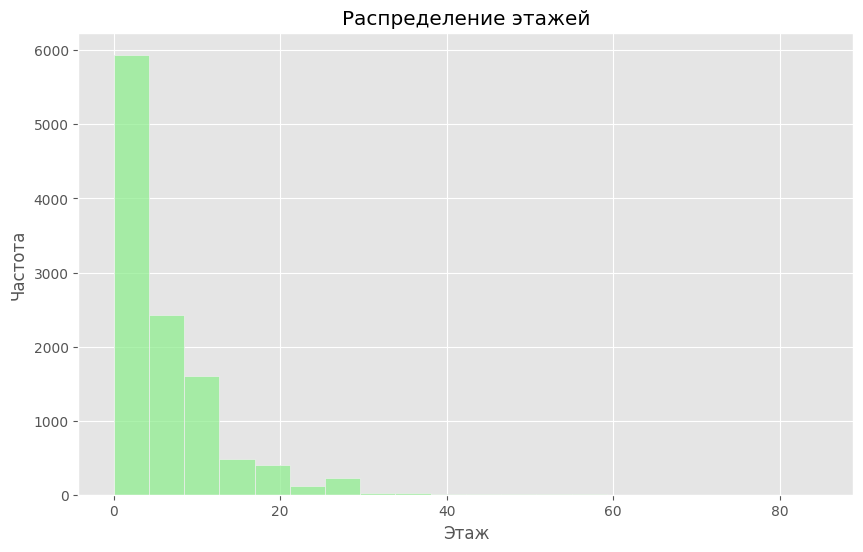

In [18]:
# Гистограмма этажей
plt.figure(figsize=(10, 6))
sns.histplot(apartment_data_cleaned['Floor'].dropna(), bins=20, kde=False, color='lightgreen')
plt.title('Распределение этажей')
plt.xlabel('Этаж')
plt.ylabel('Частота')
plt.show()


# Гистограмма общего количества этажей в домах

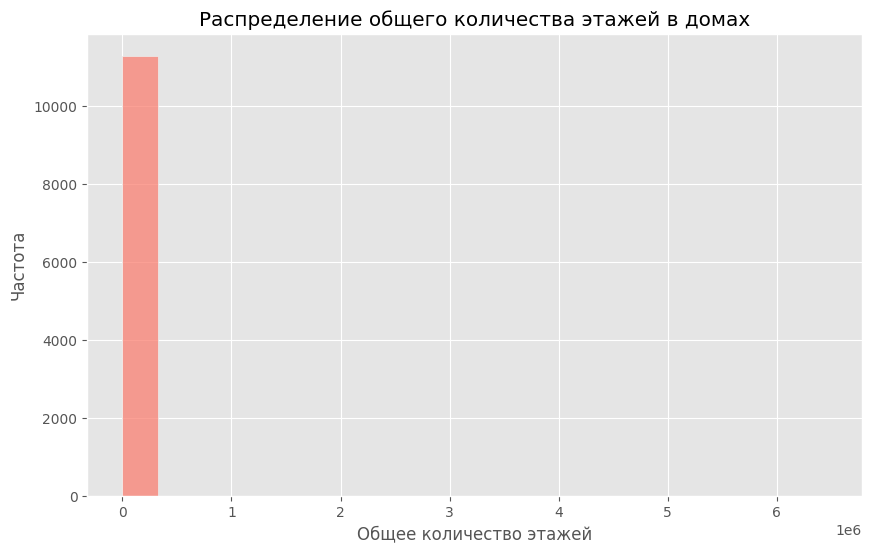

In [19]:
# Гистограмма общего количества этажей в домах
plt.figure(figsize=(10, 6))
sns.histplot(apartment_data_cleaned['Total_Floors'].dropna(), bins=20, kde=False, color='salmon')
plt.title('Распределение общего количества этажей в домах')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')
plt.show()


# Гистограмма распределения по регионам

<ipython-input-20-ae83992a4766>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=apartment_data_cleaned['Region'], palette='viridis', order=apartment_data_cleaned['Region'].value_counts().index)


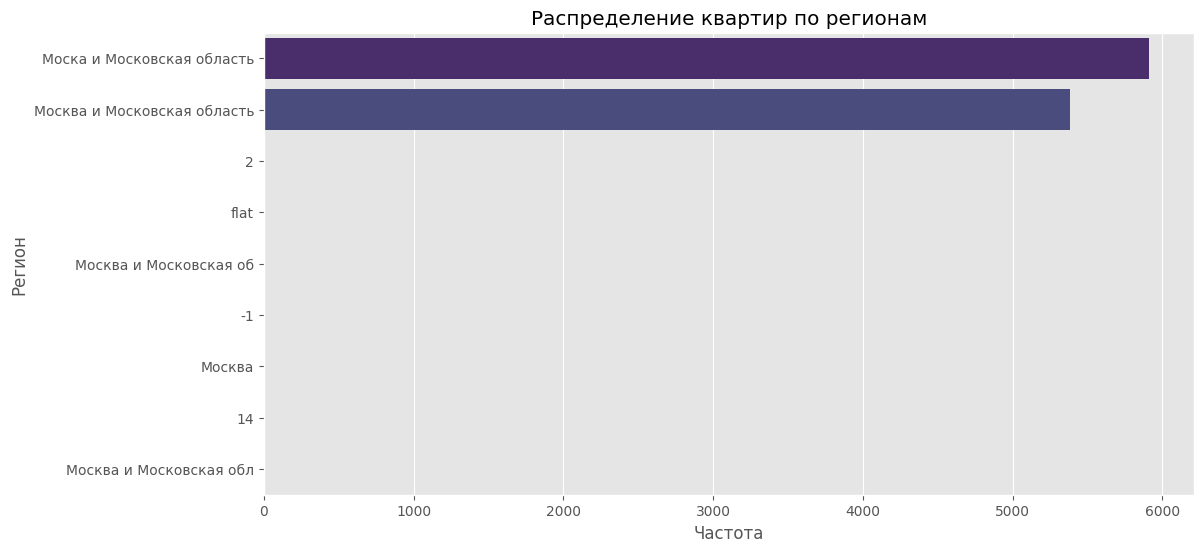

In [20]:
# Гистограмма распределения по регионам
plt.figure(figsize=(12, 6))
sns.countplot(y=apartment_data_cleaned['Region'], palette='viridis', order=apartment_data_cleaned['Region'].value_counts().index)
plt.title('Распределение квартир по регионам')
plt.xlabel('Частота')
plt.ylabel('Регион')
plt.show()


# Гистограмма состояния квартир

<ipython-input-21-bcc7a0e11921>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=apartment_data_cleaned['Condition'], palette='pastel', order=apartment_data_cleaned['Condition'].value_counts().index)


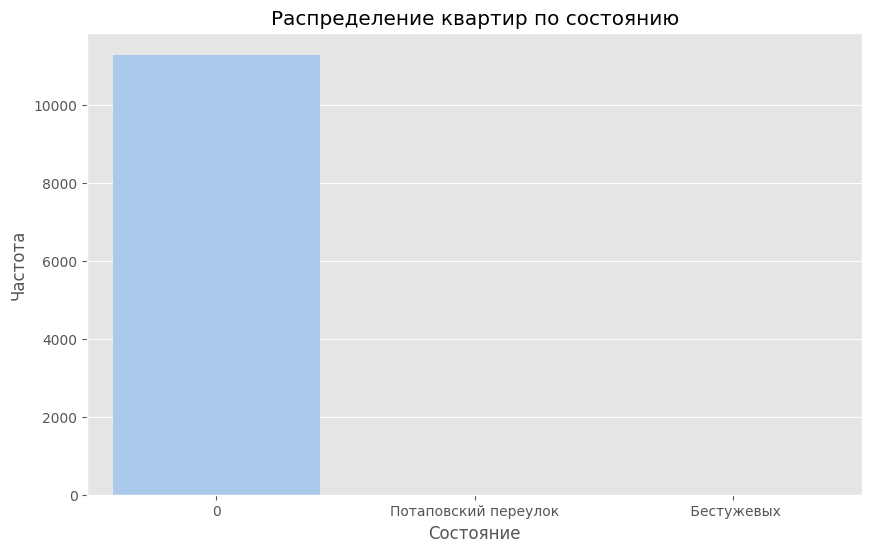

In [21]:
# Гистограмма состояния квартир
plt.figure(figsize=(10, 6))
sns.countplot(x=apartment_data_cleaned['Condition'], palette='pastel', order=apartment_data_cleaned['Condition'].value_counts().index)
plt.title('Распределение квартир по состоянию')
plt.xlabel('Состояние')
plt.ylabel('Частота')
plt.show()


# Гистограмма стоимости по категориям комнат

<ipython-input-22-3e5e5a39c4c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rooms', y='Price', data=apartment_data_cleaned, palette='muted')


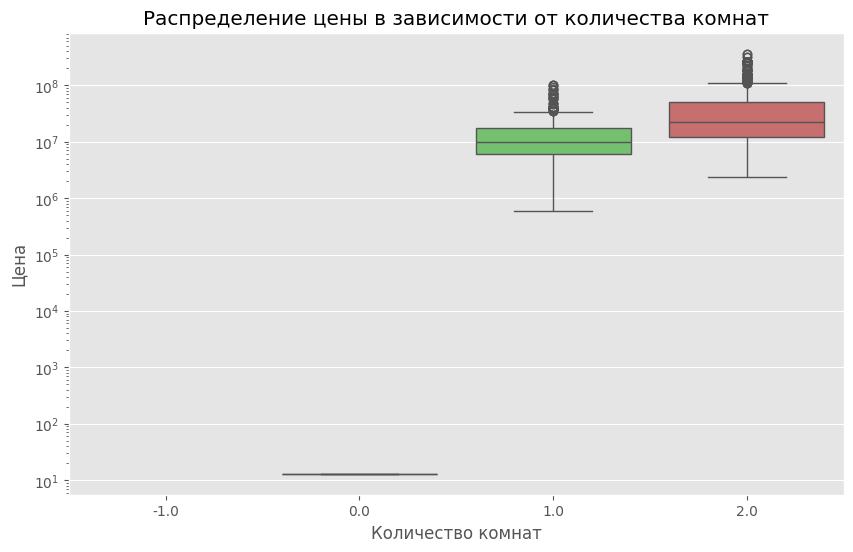

In [22]:
# Гистограмма стоимости по категориям комнат
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=apartment_data_cleaned, palette='muted')
plt.title('Распределение цены в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.yscale('log')  # Используем логарифмическую шкалу для более наглядного отображения
plt.show()

# Вывод

1. Распределение цен: График распределения цен показал, что большинство квартир находится в низком ценовом диапазоне, с некоторыми редкими выбросами на более высоких уровнях. Это может говорить о том, что рынок ориентирован на массовый сегмент, и есть всего несколько квартир с существенно более высокой стоимостью.

2. Распределение площадей: Аналогично, большинство квартир имеет сравнительно небольшую площадь, однако также присутствуют редкие крупные квартиры, которые создают выбросы. Эти более крупные объекты могут относиться к элитному или премиальному жилью.

3. Корреляция между параметрами: При анализе корреляции между площадью, ценой и количеством комнат можно ожидать, что:

  * Цена и площадь будут положительно коррелировать — чем больше квартира, тем выше её стоимость.
  * Цена и количество комнат также могут коррелировать, поскольку больше комнат обычно означает более высокую цену.
  * Площадь и количество комнат также могут коррелировать, так как большие квартиры, вероятно, имеют большее количество комнат.

Эти корреляции могут помочь понять, как лучше позиционировать цены для объектов разного размера и количества комнат или могут указывать на сегменты, где цена выше ожидаемой для данного количества комнат или площади.